In [1]:


from ConvergenceAnalysis import *


In [2]:
fd_beta_data
data_path=Path('/home/ahurta92/data')
# rename System to Molecule
fd_beta_data.rename(columns={'System': 'Molecule'}, inplace=True)
mols = fd_beta_data.Molecule.unique().tolist()
# remove KF 
mols.remove('KF')
mols.remove('LiBr')


In [3]:
fd_beta_data

,Molecule,R,dipole,alpha,beta
0,LiH,3.0150,-2.361805,21.874128,306.874000
1,BH,2.3289,-0.684961,22.559887,-10.458300
2,FH,1.7328,-0.756076,5.754232,-8.448100
3,CO,2.1320,0.104245,14.466680,31.408084
4,BF,2.3860,0.342808,16.645013,63.968600
5,NaCl,4.4613,NaN,28.700184,222.796700
6,LiBr,4.1015,NaN,34.050885,-148.976600
7,KF,4.1035,NaN,15.588210,-52.430000
8,HeNe,2.7500,NaN,22.560640,-10.459700


In [4]:
# query molecule LiH 
fd_beta_data.query('Molecule == "LiH"')

,Molecule,R,dipole,alpha,beta
0,LiH,3.015,-2.361805,21.874128,306.874


In [5]:
from DataAnalysisClass import *
beta_convergence_path=data_path/ "october_beta_absolute_kain"
paper_path = Path('beta_convergence_figures')
# mkdir for the paper path
paper_path.mkdir(exist_ok=True)
print(beta_convergence_path)



/home/ahurta92/data/october_beta_absolute_kain


In [6]:

single = ['aug-cc-pVDZ', 'aug-cc-pVTZ', 'aug-cc-pVQZ', 'aug-cc-pV5Z', 'aug-cc-pV6Z']
single_polarized = ['aug-cc-pCVDZ', 'aug-cc-pCVTZ', 'aug-cc-pCVQZ']
double = ['d-aug-cc-pVDZ', 'd-aug-cc-pVTZ', 'd-aug-cc-pVQZ', 'd-aug-cc-pV5Z', 'd-aug-cc-pV6Z']
double_polarized = ['d-aug-cc-pCVDZ', 'd-aug-cc-pCVTZ', 'd-aug-cc-pCVQZ']
all_basis_sets = single + single_polarized + double + double_polarized


In [7]:
low_q_data = QuadraticDatabase(mols, all_basis_sets, 'hf', 'dipole', [0], beta_convergence_path
                               .joinpath('low-low'), True)
high_q_data = QuadraticDatabase(mols, all_basis_sets, 'hf', 'dipole', [0],
                                beta_convergence_path
                                .joinpath('high-high'), True)
# save data

LiH /home/ahurta92/data/october_beta_absolute_kain/low-low/hf/LiH/dipole_hf_0-000000/response_base.json
/home/ahurta92/data/october_beta_absolute_kain/low-low/hf/LiH/beta.json
    Afreq  Bfreq  Cfreq  A  B  C          Beta molecule basis
0     0.0    0.0    0.0  X  X  X -9.150074e-04      LiH   MRA
1     0.0    0.0    0.0  X  X  Y  5.475594e-04      LiH   MRA
2     0.0    0.0    0.0  X  X  Z  1.872714e+02      LiH   MRA
3     0.0    0.0    0.0  X  Y  Y -3.105451e-04      LiH   MRA
4     0.0    0.0    0.0  X  Y  Z -4.510705e-09      LiH   MRA
5     0.0    0.0    0.0  X  Z  Z -1.304406e-03      LiH   MRA
6     0.0    0.0    0.0  Y  X  X  5.515004e-04      LiH   MRA
7     0.0    0.0    0.0  Y  X  Y -3.022281e-04      LiH   MRA
8     0.0    0.0    0.0  Y  X  Z -4.601786e-09      LiH   MRA
9     0.0    0.0    0.0  Y  Y  Y  1.646625e-03      LiH   MRA
10    0.0    0.0    0.0  Y  Y  Z  1.872729e+02      LiH   MRA
11    0.0    0.0    0.0  Y  Z  Z  1.885529e-03      LiH   MRA
12    0.0    0.0  

In [31]:
low_q_data.save_dfs()
high_q_data.save_dfs()


AttributeError: 'NoneType' object has no attribute 'copy'

In [14]:
low_q_data.beta_hrs_df.query('basis=="aug-cc-pVDZ" & Afreq==0.0')

AttributeError: 'NoneType' object has no attribute 'query'

In [9]:
sns plotting context to talk
sns.set_context('talk')

In [10]:

# get the percent error relative to the FD datal
beta_data = low_q_data.q_df.copy()
beta_data = high_q_data.q_df.copy()

low_z_data = create_z_beta_data(low_q_data.q_df)
# add column called MRA-LOW
low_z_data['Protocol'] = 'Medium'
high_z_data = create_z_beta_data(high_q_data.q_df)
# add column called MRA-HIGH
high_z_data['Protocol'] = 'High'
# concatenate the two dataframes
z_data = pd.concat([low_z_data, high_z_data], axis=0)

z_data


AttributeError: 'NoneType' object has no attribute 'copy'

In [11]:

beta_z_plot = compare_z_beta_to_basis_set(z_data, 'Absolute Percent Error')
# save the plot
beta_z_plot.savefig(paper_path.joinpath('beta_z_plot_2.svg'), dpi=600)


NameError: name 'z_data' is not defined

In [12]:
z_data.query('basis=="MRA"').sort_values('molecule')

NameError: name 'z_data' is not defined

In [13]:



low_data = PolarizabilityData(mols, 'hf', 'dipole', all_basis_sets,
                              october_absolute_kain_path.joinpath
                              ('low-low'), overwrite=False)
high_data = PolarizabilityData(mols, 'hf', 'dipole', all_basis_sets, october_absolute_kain_path
                               .joinpath('high-high'), overwrite=False)

low_data.save_dfs()
high_data.save_dfs()
low_data.polar_data.query('omega==0')
low_data.iso_data.query('omega==0')


energy_df
LiH hf dipole /mnt/data/madness_data/october_beta_absolute_kain/low-low
[Errno 2] No such file or directory: '/mnt/data/madness_data/october_beta_absolute_kain/low-low/json_data/frequency.json'
Did not find the new mra data for LiH
Trying FrequencyData
[Errno 2] No such file or directory: '/mnt/data/madness_data/october_beta_absolute_kain/low-low/molecules/frequency.json'
Did not find the old or new mra data for LiH
BH hf dipole /mnt/data/madness_data/october_beta_absolute_kain/low-low
[Errno 2] No such file or directory: '/mnt/data/madness_data/october_beta_absolute_kain/low-low/json_data/frequency.json'
Did not find the new mra data for BH
Trying FrequencyData
[Errno 2] No such file or directory: '/mnt/data/madness_data/october_beta_absolute_kain/low-low/molecules/frequency.json'
Did not find the old or new mra data for BH
FH hf dipole /mnt/data/madness_data/october_beta_absolute_kain/low-low
[Errno 2] No such file or directory: '/mnt/data/madness_data/october_beta_absolute

AttributeError: 'NoneType' object has no attribute 'query'

In [14]:
low_z_data = create_z_data(low_data, 'two')
# create Protocol column
low_z_data['Protocol'] = 'Medium'
high_z_data = create_z_data(high_data, 'two')
high_z_data['Protocol'] = 'High'
z_data = pd.concat([low_z_data, high_z_data])
z_data
# remove HeNe
z_data = z_data.query('molecule!="HeNe"')



AttributeError: 'NoneType' object has no attribute 'query'

In [15]:
z_abs_error_plot = compare_z_to_basis_set(z_data, y='Absolute Percent Error')
z_abs_error_plot.savefig(paper_path.joinpath('z_abs_error_plot_2.svg'), dpi=600)


NameError: name 'z_data' is not defined

In [15]:
low_data.iso_data.query('omega==0')
# grab the basis set data only 
basis_data = low_data.iso_data.query('omega==0 and basis!="MRA"').copy()
# add a column for the MRA data for each molecule by mapping based on molecule
basis_data['alpha(MRA)'] = basis_data['molecule'].map(low_data.iso_data.query('omega==0 and '
                                                                              'basis=="MRA"').set_index
                                                      ('molecule')['alpha'].to_dict())
basis_data['gamma(MRA)'] = basis_data['molecule'].map(low_data.iso_data.query('omega==0 and '
                                                                              'basis=="MRA"').set_index
                                                      ('molecule')['gamma'].to_dict())
#basis_data
# compute the percent error in alpha and gamma
basis_data['alpha error'] = 100 * (basis_data['alpha'] - basis_data['alpha(MRA)']) / basis_data[
    'alpha(MRA)']
basis_data['gamma error'] = 100 * (basis_data['gamma'] - basis_data['gamma(MRA)']) / basis_data[
    'gamma(MRA)']


In [16]:
basis_data = make_detailed_df(basis_data)
basis_data


['D', 'T', 'Q', '5']


,molecule,basis,omega,alpha,gamma,alpha(MRA),gamma(MRA),alpha error,gamma error,augmentation,polarization,mol_system,valence,Type
10,LiH,aug-cc-pVDZ,0,23.901375,4.651790,24.143613,3.404225,-1.003323,36.647559,aug,V,First-row,D,aug-cc-pVnZ
20,LiH,aug-cc-pVTZ,0,24.160270,3.426007,24.143613,3.404225,0.068990,0.639865,aug,V,First-row,T,aug-cc-pVnZ
30,LiH,aug-cc-pVQZ,0,24.145022,3.402734,24.143613,3.404225,0.005836,-0.043811,aug,V,First-row,Q,aug-cc-pVnZ
40,LiH,d-aug-cc-pVDZ,0,24.378137,3.990831,24.143613,3.404225,0.971370,17.231712,d-aug,V,First-row,D,d-aug-cc-pVnZ
50,LiH,d-aug-cc-pVTZ,0,24.208182,3.381911,24.143613,3.404225,0.267435,-0.655473,d-aug,V,First-row,T,d-aug-cc-pVnZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,HeNe,aug-cc-pCVTZ,0,NaN,NaN,3.519983,0.248032,NaN,NaN,aug,CV,First-row,T,aug-cc-pCVnZ
1010,HeNe,aug-cc-pCVQZ,0,NaN,NaN,3.519983,0.248032,NaN,NaN,aug,CV,First-row,Q,aug-cc-pCVnZ
1020,HeNe,d-aug-cc-pV5Z,0,NaN,NaN,3.519983,0.248032,NaN,NaN,d-aug,V,First-row,5,d-aug-cc-pVnZ
1030,HeNe,d-aug-cc-pCVDZ,0,NaN,NaN,3.519983,0.248032,NaN,NaN,d-aug,CV,First-row,D,d-aug-cc-pCVnZ


In [18]:
low_data.iso_data.query('omega==0')
# grab the basis set data only 
basis_data = low_data.iso_data.query('omega==0 and basis!="MRA"').copy()
# add a column for the MRA data for each molecule by mapping based on molecule
basis_data['alpha(MRA)'] = basis_data['molecule'].map(low_data.iso_data.query('omega==0 and '
                                                                              'basis=="MRA"').set_index
                                                      ('molecule')['alpha'].to_dict())
basis_data['gamma(MRA)'] = basis_data['molecule'].map(low_data.iso_data.query('omega==0 and '
                                                                              'basis=="MRA"').set_index
                                                      ('molecule')['gamma'].to_dict())
#basis_data
# compute the percent error in alpha and gamma
basis_data['alpha error'] = 100 * (basis_data['alpha'] - basis_data['alpha(MRA)']) / basis_data[
    'alpha(MRA)']
basis_data['gamma error'] = 100 * (basis_data['gamma'] - basis_data['gamma(MRA)']) / basis_data[
    'gamma(MRA)']



In [24]:
basis_data = high_q_data.beta_hrs_df.query('basis!="MRA" & Afreq==0.0').copy()
basis_data['beta(MRA)'] = basis_data['molecule'].map(low_q_data.beta_hrs_df.query('basis=="MRA" & '
                                                                                  'Afreq==0.0')
                                                     .set_index('molecule')['Beta'].to_dict())
basis_data['betaE'] = 100 * (basis_data['Beta'] - basis_data['beta(MRA)']) / basis_data['beta(MRA)']
basis_data = make_detailed_df(basis_data)
basis_data

['D', 'T', 'Q', '5']


,molecule,basis,Afreq,Bfreq,Cfreq,dipolar,octupolar,Beta,beta(MRA),betaE,augmentation,polarization,mol_system,valence,Type
0,LiH,aug-cc-pVDZ,0.0,0.0,0.0,424093.133117,45931.253108,314.033953,253.594948,23.832890,aug,V,First-row,D,aug-cc-pVnZ
1,LiH,aug-cc-pVTZ,0.0,0.0,0.0,306354.166282,27217.402022,265.839871,253.594948,4.828536,aug,V,First-row,T,aug-cc-pVnZ
2,LiH,aug-cc-pVQZ,0.0,0.0,0.0,286014.493910,26333.729090,257.034532,253.594948,1.356330,aug,V,First-row,Q,aug-cc-pVnZ
3,LiH,aug-cc-pCVDZ,0.0,0.0,0.0,397107.422713,44988.141582,304.188558,253.594948,19.950559,aug,CV,First-row,D,aug-cc-pCVnZ
4,LiH,aug-cc-pCVTZ,0.0,0.0,0.0,301547.345510,27699.590042,263.910169,253.594948,4.067597,aug,CV,First-row,T,aug-cc-pCVnZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,HeNe,aug-cc-pVTZ,0.0,0.0,0.0,2.508604,0.615460,0.784909,0.568322,38.110076,aug,V,First-row,T,aug-cc-pVnZ
94,HeNe,aug-cc-pVQZ,0.0,0.0,0.0,2.299227,0.361254,0.738474,0.568322,29.939522,aug,V,First-row,Q,aug-cc-pVnZ
95,HeNe,d-aug-cc-pVDZ,0.0,0.0,0.0,1.046337,0.132227,0.495088,0.568322,-12.885905,d-aug,V,First-row,D,d-aug-cc-pVnZ
96,HeNe,d-aug-cc-pVTZ,0.0,0.0,0.0,1.713907,0.166664,0.629874,0.568322,10.830528,d-aug,V,First-row,T,d-aug-cc-pVnZ


D
T
Q
5


/tmp/ipykernel_51125/3523716643.py:33: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=.02, linestyle='--', color='orange')
/tmp/ipykernel_51125/3523716643.py:34: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=-.02, linestyle='--', color='orange')


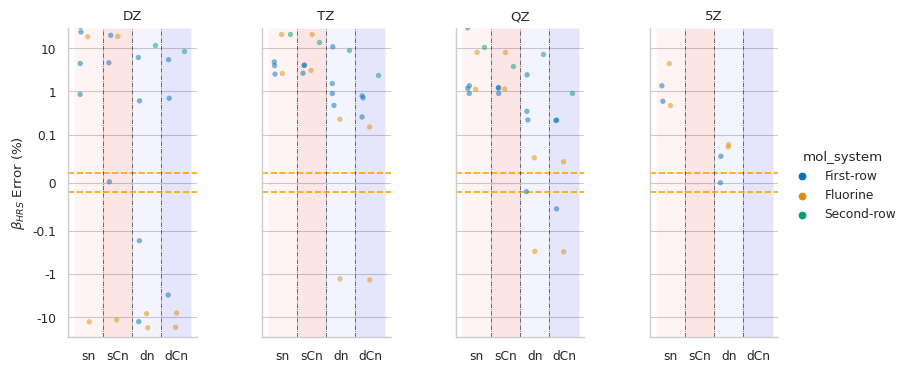

In [28]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

aspect_ratio = .5
Type_map = {"aug-cc-pVnZ": "sn", "aug-cc-pCVnZ": "sCn", "d-aug-cc-pVnZ": "dn",
            "d-aug-cc-pCVnZ": "dCn"}
vlevel = ['D', 'T', 'Q', '5']

plot_data = basis_data.query('valence.isin(@vlevel) and Afreq==0').copy()
with sns.plotting_context('paper', font_scale=1.00):
    g = sns.catplot(col='valence', x='Type', y='betaE', hue='mol_system',
                    data=plot_data, kind='strip', dodge=True, jitter=True,
                    s=15, palette='colorblind', height=4, aspect=aspect_ratio, sharey=True,
                    alpha=0.5,
                    sharex=False)
    # adjust the title to read D=$\zeta$D, T=$\zeta$T, etc.
    g.set_titles('{col_name}Z')
    g.set_xlabels('')

    g.set_xticklabels([Type_map[label.get_text()] for label in g.axes.flat[0].get_xticklabels()])
    v = 0
    for ax in g.axes.flat:
        # draw horizontal line at .05%
        # get the valence level from the title
        c = vlevel[v]
        v += 1
        print(c)
        xl = ['aug', 'aug+core', 'd-aug', 'd-aug+core']
        xl = ['s-n', 's-Cn', 'd-n', 'd-Cn']
        xl = ['sn', 'sCn', 'dn', 'dCn']
        ax.set_xticklabels(xl)

        ax.set_yscale('symlog', linthresh=1e-1)
        ax.axhline(y=.02, linestyle='--', color='orange')
        ax.axhline(y=-.02, linestyle='--', color='orange')
        # for the symlog scale to regular notation with no decimal places for the y axis
        ax.yaxis.set_major_formatter(ScalarFormatter())
        ax.yaxis.set_major_formatter(FormatStrFormatter('%2g'))

        # make the y limits symmetrical for each plot using the max absolute value
        max_lim = max(abs(ax.get_ylim()[0]), abs(ax.get_ylim()[1]))
        ax.set_ylim(-30, 30)

        ax.set_ylabel(r'$\beta_{HRS}$ Error (%)')
        # rotate the xlabels
        for label in ax.get_xticklabels():
            label.set_rotation(0)
            #label.set_horizontalalignment('right')
        # create vertical lines to separate basis sets
        for i in range(1, len(plot_data.Type.unique())):
            ax.axvline(i - .5, linestyle='-.', color='k', linewidth=.5, alpha=.8)
        for i in range(1, 5):
            ax.axvspan((i - 1) - .5, i - .5, 1e-3, facecolor=pal[i - 1], alpha=0.1)
        # remove the legend title


In [30]:
import glob

beta_path = Path('/mnt/data/madness_data/august_no_symmetry')
beta_mol = '/mnt/data/madness_data/august_no_symmetry/molecules/*.mol'

# glob for .mol files in august molecules directory
mols = glob.glob(beta_mol)
# remove .mol extension
mols = [mol.split('/')[-1].split('.')[0] for mol in mols]
print(mols)


['FNO', 'CH3SH', 'C2H4', 'H2', 'Cl2', 'N2H2', 'CH3NH2', 'HOCl', 'BeH2', 'SiO', 'Mg', 'HBS', 'HBO', 'CH2BH', 'Ne', 'PH3O', 'ClF', 'HF', 'BH2Cl', 'Li2', 'SiH4', 'SF2', 'P2H4', 'CO2', 'NaCN', 'Ar', 'OCl2', 'P2', 'CH3Cl', 'SCl2', 'HCCF', 'LiH', 'BF', 'SiH3F', 'HCONH2', 'He', 'CS', 'S2H2', 'FCN', 'NaCl', 'SiH3Cl', 'N2H4', 'NH2Cl', 'LiCl', 'NH3O', 'NH2OH', 'BH3', 'SO2', 'HCN', 'CH3BH2', 'NaLi', 'HOF', 'CH3F', 'HNS', 'CH3OH', 'C2H2', 'Na2', 'F2', 'O3', 'C6H6', 'CH2NH', 'ClCN', 'Mg2', 'NH3', 'H2O', 'PH3', 'N2', 'BHF2', 'LiCN', 'NH2F', 'Be', 'CH4', 'HCl', 'HCCCl', 'HCOOH', 'HCHS', 'LiH_s', 'HCHO', 'SH2', 'CSO', 'HOOH', 'CO', 'HCP', 'NOCl', 'HNO', 'NaH', 'OF2', 'HNC', 'BH2F', 'LiBH4']


In [32]:

beta_path = Path('/mnt/data/madness_data/august_no_symmetry')
quad_data = QuadraticDatabase(mols, all_basis_sets, 'hf', 'dipole', [0], beta_path, False)
quad_data.save_dfs()
# save data


FNO /mnt/data/madness_data/august_no_symmetry/hf/FNO/dipole_hf_0-000000/response_base.json
FNO /mnt/data/madness_data/august_no_symmetry/hf/FNO/dipole_hf_0-009268/response_base.json
FNO /mnt/data/madness_data/august_no_symmetry/hf/FNO/dipole_hf_0-018535/response_base.json
FNO /mnt/data/madness_data/august_no_symmetry/hf/FNO/dipole_hf_0-027803/response_base.json
FNO /mnt/data/madness_data/august_no_symmetry/hf/FNO/dipole_hf_0-037071/response_base.json
FNO /mnt/data/madness_data/august_no_symmetry/hf/FNO/dipole_hf_0-046338/response_base.json
FNO /mnt/data/madness_data/august_no_symmetry/hf/FNO/dipole_hf_0-055606/response_base.json
FNO /mnt/data/madness_data/august_no_symmetry/hf/FNO/dipole_hf_0-064874/response_base.json
FNO /mnt/data/madness_data/august_no_symmetry/hf/FNO/dipole_hf_0-074141/response_base.json
/mnt/data/madness_data/august_no_symmetry/hf/FNO/beta.json
        Afreq     Bfreq  Cfreq  A  B  C       Beta molecule basis
0    0.000000  0.000000    0.0  X  X  X  -5.911257      

KeyError: '0.0'